In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv('data.csv')

## 同一指令集间对比

### 线程数

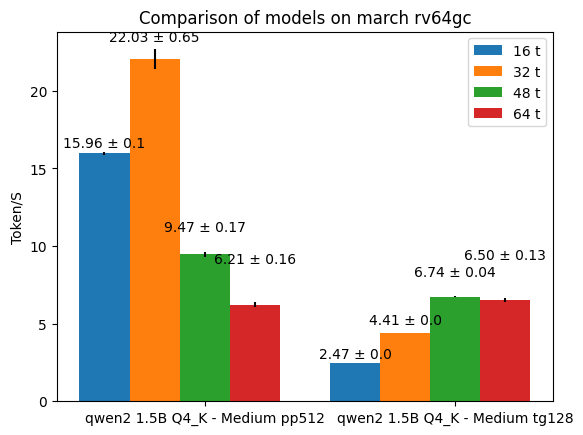

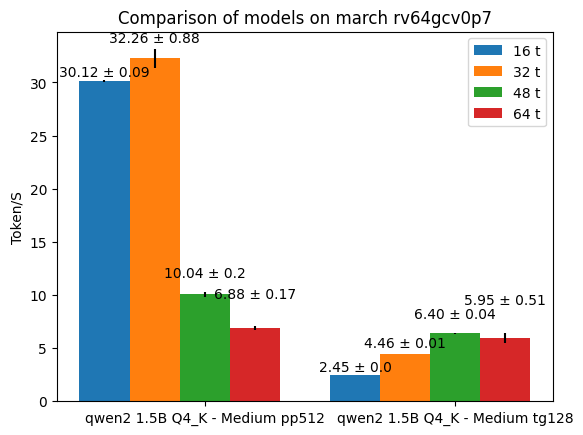

In [143]:
cmp1 = csv[csv['model'] == 'qwen2 1.5B Q4_K - Medium']
cmp1 = cmp1[(cmp1['march'] == 'rv64gc') | (cmp1['march'] == 'rv64gcv0p7')]
cmp1 = cmp1.groupby(['march'])
for name1, group1 in cmp1:
    x = []
    label = [threads[0] for threads, _ in group1.groupby(['threads'])]
    y = []
    y_err = []

    for model, model_group in group1.groupby(['model']):
        for test, test_group in model_group.groupby(['test']):
            x.append(f"{model[0]} {test[0]}")
            t_t_s = test_group[['threads', 't_s']]
            # sorted by threads
            t_s = [[np.float32(0), np.float32(0)] for _ in range(len(label))]
            for i, row in t_t_s.iterrows():
                t_s[label.index(row['threads'])] = [float(i.strip())
                                                    for i in row['t_s'].split('±')]
            y.append([i[0] for i in t_s])
            y_err.append([i[1] for i in t_s])
    y = np.array(y)
    y_err = np.array(y_err)
    y = y.T
    y_err = y_err.T
    # draw the plot
    fig, ax = plt.subplots()
    x_idx = np.arange(len(x))
    width = 0.2
    x_pos = [x_idx + i*width - width*len(label)/2 for i in range(len(label))]
    for i in range(len(label)):
        ax.bar(x_pos[i], y[i], width, yerr=y_err[i], label=f"{label[i]} t")
    # add bar label
    for i in range(len(x)):
        for j in range(len(label)):
            ax.text(x_pos[j][i], y[j][i] + y_err[j][i] + + 0.1 + 0.25 * j * j,
                    f"{y[j][i]:.2f} ± {y_err[j][i]}", ha='center', va='bottom')
    ax.set_xticks(x_idx)
    ax.set_xticklabels(x)
    ax.set_ylabel('Token/S')
    ax.set_title(f"Comparison of models on march {name1[0]}")
    ax.legend()
    plt.show()